##  Tham số Kmeans

### Input

- img_1d = ảnh (sau khi chuyển từ 2 chuyền -> 1 chiều)
- k_cluster = k màu
- max_iter = số vòng lặp tối đa (0 -> max_iter)
- init_cluster = kiểu tạo ra cái mảng `centroids` (random, in_pixels)
    * Random: [0, 0, 0] -> [255, 255, 255] (RGB) * k 
    * In_pixels: cũng là random nhưng lấy từ ảnh ban đầu
                 random k điểm ảnh trong img_1d

In [14]:
import numpy as np

img_2d = np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]])

print(img_2d.shape)

(5, 5, 3)


In [15]:
img_1d = np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), 'uint8', img_2d.astype('uint8'))
# arr.astype('uint8')

print(img_1d.shape)

(25, 3)


In [16]:
# init_cluster = random
k = 3
centroids = []

for _ in range(k):
    centroids.append([np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)])

centroids = np.array(centroids, dtype='uint8')

print(centroids)

[[180 199 103]
 [ 84   8 208]
 [100  82  88]]


In [17]:
# init_cluster = in_pixels
k = 3
centroids = []

for _ in range(k):
    centroids.append(img_1d[np.random.randint(0, img_1d.shape[0])])

centroids = np.array(centroids, dtype='uint8')

print(centroids)

[[255 255 255]
 [255 255 255]
 [255 255 255]]


### Output

- Kích thước của lables = kích thước của img_1d = dài x rộng
- Mảng đánh dấu

In [18]:
# [[255   0   0]
# [255 255 255]
# [255 255 255]]
print(img_1d)
# labels[0] = 1
# labels[1] = 0
# ...

[[255 255 255]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255   0   0]
 [255 255 255]
 [255 255 255]
 [255   0   0]
 [255   0   0]
 [255   0   0]
 [255 255 255]]


## Đọc ảnh

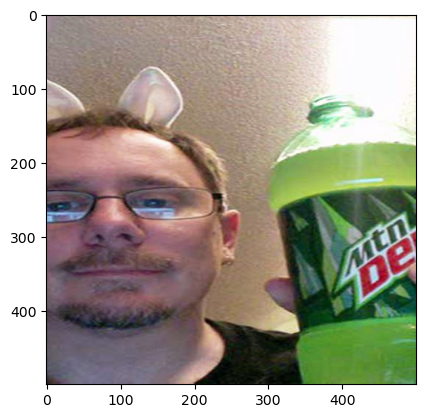

In [19]:
# Import PIL
from PIL import Image
# import plt
import matplotlib.pyplot as plt

img = Image.open('main.jpg')
plt.imshow(img)

## Chuyển sang 2 chiều

In [20]:
img_2d = np.array(img)

print(img_2d)

print(img_2d.shape)

[[[170 150 162]
  [169 149 161]
  [168 146 158]
  ...
  [202 185 175]
  [205 188 178]
  [208 191 181]]

 [[169 149 161]
  [168 148 160]
  [168 146 158]
  ...
  [241 224 214]
  [243 226 216]
  [245 228 218]]

 [[168 148 160]
  [167 147 159]
  [166 146 157]
  ...
  [239 225 212]
  [239 225 212]
  [240 226 213]]

 ...

 [[ 28  18  42]
  [ 34  22  42]
  [ 40  29  43]
  ...
  [ 80 140  89]
  [ 72 132  81]
  [ 70 130  79]]

 [[ 29  19  43]
  [ 33  24  43]
  [ 41  30  44]
  ...
  [ 83 143  92]
  [ 76 136  85]
  [ 74 134  83]]

 [[ 33  23  47]
  [ 37  28  47]
  [ 45  34  48]
  ...
  [ 87 147  96]
  [ 80 140  89]
  [ 78 138  87]]]
(500, 500, 3)


## Chuyển sang 1 chiều:

In [21]:
img_1d = np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), 'uint8', img_2d.astype('uint8'))

display(img_1d)

array([[170, 150, 162],
       [169, 149, 161],
       [168, 146, 158],
       ...,
       [ 87, 147,  96],
       [ 80, 140,  89],
       [ 78, 138,  87]], dtype=uint8)

## K-Means

### Hàm hỗ trợ:

- Tính khoảng cách giữa 2 điểm

In [22]:
# Do thằng quỷ này chứ không ai hết
def CalcDistance(color1, color2):
    return np.sqrt(np.sum((color1.astype('int64') - color2.astype('int64')) ** 2))

In [23]:
print(CalcDistance(np.array([0, 0, 0]).astype('uint8'), np.array([255, 0, 0]).astype('uint8')))
# [3, 3, 3] ^ 2
# [9, 9, 9]
# sum = 27
# sqrt(27) = 5.196152422706632

255.0


- Khởi tạo lables

In [24]:
labels = np.zeros((img_1d.shape[0] * img_1d.shape[1], ), dtype='uint8')

print(labels.shape[0])
print(img_1d.shape[1] * img_1d.shape[0])

750000
750000


### Hàm chính:

In [25]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    # init_cluster = random
    centroids = []

    for _ in range(k_clusters):
        centroids.append(img_1d[np.random.randint(0, img_1d.shape[0])])

    centroids = np.ndarray((k_clusters, img_1d.shape[1]), 'uint8', np.array(centroids))
    labels = np.ndarray((img_1d.shape[0], ), 'int32', np.zeros((img_1d.shape[0], ), dtype='int32'))
    # Tất cả các điểm đều thuộc cluster 0
    # labels[i] là vị trí của màu (trong centroids) gần với i nhất

    for i in range(img_1d.shape[0]):
        for j in range(centroids.shape[0]):
            if (CalcDistance(img_1d[i], centroids[j]) < CalcDistance(img_1d[i], centroids[labels[i]])):
                labels[i] = j

    # Centroid các màu random, labels (đúng)
    # Xử lí
    for _ in range(max_iter):

        # Tính lại centroids mới
        for i in range(k_clusters):
            c = np.ndarray((img_1d.shape[1], ), 'int32', np.zeros((img_1d.shape[1], ), dtype='int32'))
            count = 0

            for j in range(img_1d.shape[0]):
                if (labels[j] == i):
                    c += img_1d[j] # c = c + img_1d[j]
                    count += 1      

            if (count != 0):
                centroids[i] = (c / count).astype('uint8')

        # Tính lại labels
        for i in range(img_1d.shape[0]):
            for j in range(centroids.shape[0]):
                if (CalcDistance(img_1d[i], centroids[j]) < CalcDistance(img_1d[i], centroids[labels[i]])):
                    labels[i] = j


    return centroids, labels

centroids, labels = kmeans(img_1d, 5, 1, 'random')

array([0, 1, 2, 3, 4])

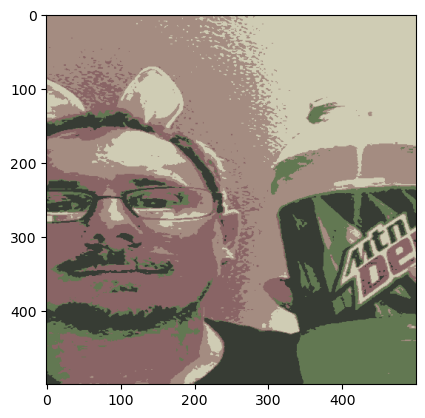

In [26]:
# centroids gồm k màu
# labels có kích thước = img_1d.shape[0]

display(np.unique(labels))

new_img_1d = np.ndarray((labels.shape[0], centroids.shape[1]), 'uint8', np.array([centroids[l] for l in labels]))

new_img_1d = np.array(new_img_1d)
new_img_1d = np.ndarray((img_1d.shape[0], img_1d.shape[1]), 'uint8', new_img_1d)
new_img_2d = np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))

plt.imshow(new_img_2d)